# Compare Ronchi grating  and Hologram In Zemax

- author : Sylvie Dagoret-Campagne
- affiliation : LAL
- date April 26th 2017


In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools

In [24]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Definitions

## Constants for conversions

In [25]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
micr_to_mm=1e-3
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [26]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [27]:
deg_to_rad=np.pi/180.

In [28]:
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin
arcmin_ro_rad=1./rad_to_arcmin

## Configuration parameters at the telescope

#### telescope

In [29]:
Tel_Focal_Length=12.6 # m : Focal length of the telescope
Tel_Diameter=0.9 # m : Diameter of the telescope    
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

#### filter

In [30]:
Filt_D=0.05769 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

#### CCD detector

In [31]:
Det_xpic=24.0 # microns per pixel
Det_NbPix=2048 # number of pixels per CCD side
Det_size=Det_xpic*Det_NbPix*micr_to_mm # CCD size in mm, 5 cm or 2 inch

# Data

In [32]:
wl = np.array([400., 600., 800., 1000.])

In [33]:
Airy_radius=np.array([6.8,10.25,13.64,17.])

In [34]:
# null incident angle
RMS_Ronchi_1=np.array([22.03,34.7,53.8,80.6])

In [35]:
# null incident angle
RMS_Holo_1=np.array([14.6,14.4,20.5,32.6])

In [36]:
RMS_Holo_1_p1arcmin=np.array([22.1,25.4,25.1,21.4])
RMS_Holo_1_m1arcmin=np.array([22.4,33.9,51.5,72.2])

In [37]:
RMS_Holo_1_p5arcmin=np.array([62.9,91.5,117.4,141.1])
RMS_Holo_1_m5arcmin=np.array([75.1,115.6,160.9,212.4])


# Plot for P2IO

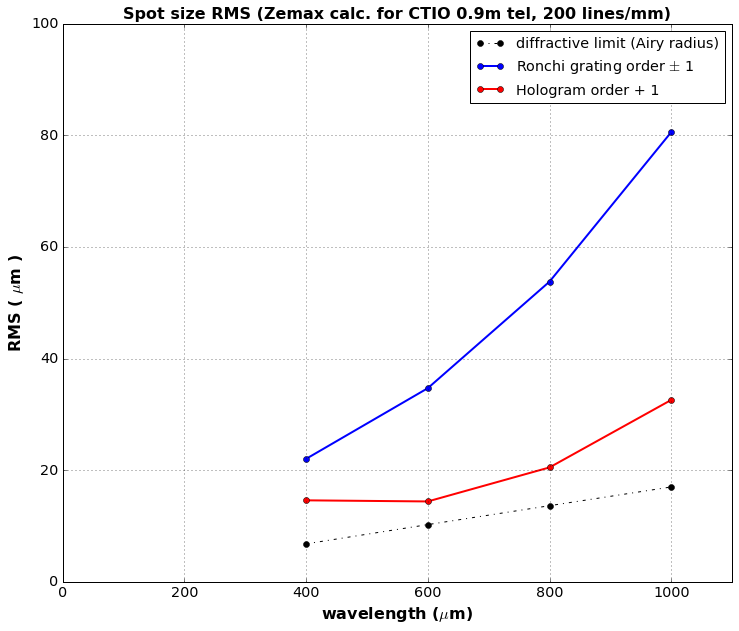

In [38]:
plt.plot(wl,Airy_radius,'ko-.',label='diffractive limit (Airy radius)',lw=1)
plt.plot(wl,RMS_Ronchi_1,'bo-',label='Ronchi grating order $\pm$ 1',lw=2)
plt.plot(wl,RMS_Holo_1,'ro-',label='Hologram order + 1',lw=2)
plt.xlim(0,1100)
plt.ylim(0.,100.)
plt.title("Spot size RMS (Zemax calc. for CTIO 0.9m tel, 200 lines/mm)",fontweight='bold',fontsize=16)
plt.xlabel("wavelength ($\mu$m)",fontweight='bold',fontsize=16)
plt.ylabel("RMS ( $\mu$m )",fontweight='bold',fontsize=16)
plt.grid()
plt.legend(loc='best')
plt.savefig('RMSZemax_RonchiHolo.jpg')

# Plot for Seillac

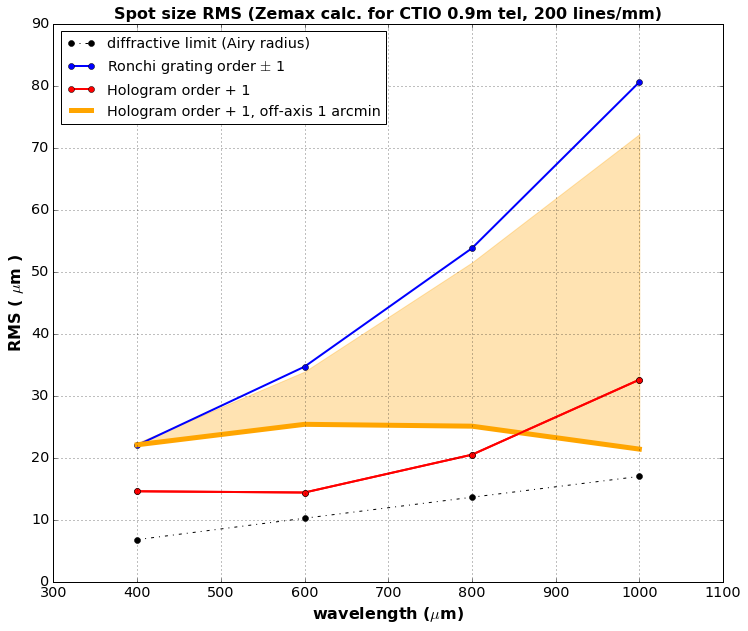

In [41]:
plt.plot(wl,Airy_radius,'ko-.',label='diffractive limit (Airy radius)',lw=1)
plt.plot(wl,RMS_Ronchi_1,'bo-',label='Ronchi grating order $\pm$ 1',lw=2)
plt.plot(wl,RMS_Holo_1,'ro-',label='Hologram order + 1',lw=2)
plt.plot(wl,RMS_Holo_1_p1arcmin,color='orange',lw=5,label='Hologram order + 1, off-axis 1 arcmin')
#plt.plot(wl,RMS_Holo_1_p5arcmin,color='orange',lw=5,label='Hologram order + 1, -5 to +5 arcmin')
plt.fill_between(wl, RMS_Holo_1_p1arcmin, RMS_Holo_1_m1arcmin, color='orange', alpha='0.3')
#plt.fill_between(wl, RMS_Holo_1_p5arcmin, RMS_Holo_1_m5arcmin, color='orange', alpha='0.3')
plt.plot(wl,RMS_Holo_1,'ro-',lw=2)
plt.xlim(300.,1100)
plt.ylim(0.,90.)
plt.title("Spot size RMS (Zemax calc. for CTIO 0.9m tel, 200 lines/mm)",fontweight='bold',fontsize=16)
plt.xlabel("wavelength ($\mu$m)",fontweight='bold',fontsize=16)
plt.ylabel("RMS ( $\mu$m )",fontweight='bold',fontsize=16)
plt.grid()
plt.legend(loc=2)
plt.savefig('RMSZemax_RonchiHoloFillColor.jpg')



#plt.fill_between(wl, RMS_Holo_1_p1arcmin, RMS_Holo_1_p1arcmin, color='grey', alpha='0.5')